# The Story of The Salton Sea

The Salton sea has been the sight of significant environmental upheaval in recent years as the lake dries up due to climate change. Week hope to explore more thoroughly what is happening in this area and how this impacts the community in the area.

In [57]:
# import packages

import pandas as pd
import geopandas as gpd

import plotly.express as px
import osmnx as ox

import matplotlib.pyplot as plt
import xyzservices.providers as xyz

import numpy as np
import rasterio
import rasterio.plot

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import contextily as ctx



## Maggie's Stuff

Our first order of houskeeping is to establish the set of census tracts we want to use for plotting: "Our_FIPS"

In [57]:
wetlands = gpd.read_file('CA_Wetlands_South.shp')

DriverError: Unable to open CA_Wetlands_South.shx or CA_Wetlands_South.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

## Renewable Energy Development
Step One: Pull all data on power plants from open street map using set coordinates as geographic parameter and define that new data set as "osm_power"
Step Two: Set the crs to espg=4236
Steo Three: Plot osm_power
Step Four: Add the Esri.WorldImagry basemap

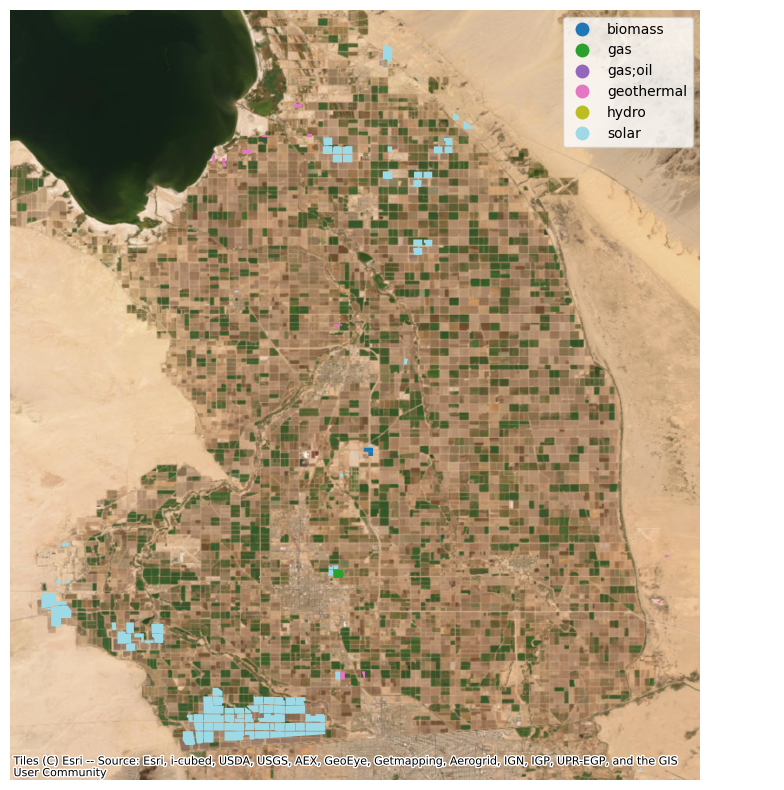

In [58]:
#Step One:
osm_power = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'power':'plant'})

#Step Two: 
osm_power = osm_power.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

#Step Three:
osm_power.plot(ax=ax,
         column='plant:source',
         cmap='tab20',
         legend=True)
ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery)

fig.savefig("renewables.jpg")



In [59]:
#Step Five -- Creating a count of plants by year

osm_power_yrs=pd.read_csv("osm_power_years.csv")
osm_power=osm_power.merge(osm_power_yrs,on='name')
osm_power['year_commissioned'] = osm_power['year_commissioned'].fillna(0).replace([np.inf, -np.inf], 0)

osm_power['year_commissioned']=osm_power['year_commissioned'].astype(int)

osm_power = osm_power[osm_power['year_commissioned'] != 0]

plants_by_year =osm_power.groupby(['year_commissioned','plant:source']).size().reset_index(name='count')
plants_by_year


year_commissioned plant:source  count
0                1985   geothermal      2
1                1989   geothermal      1
2                1993   geothermal      1
3                1996   geothermal      1
4                2000   geothermal      1
5                2008          gas      1
6                2012   geothermal      1
7                2012        solar      2
8                2013        solar      3
9                2014        solar      2
10               2016        solar      2
11               2017        solar      1
12               2018        solar      3
13               2019        solar      1
14               2020        solar      2
15               2021        solar      1

/opt/conda/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



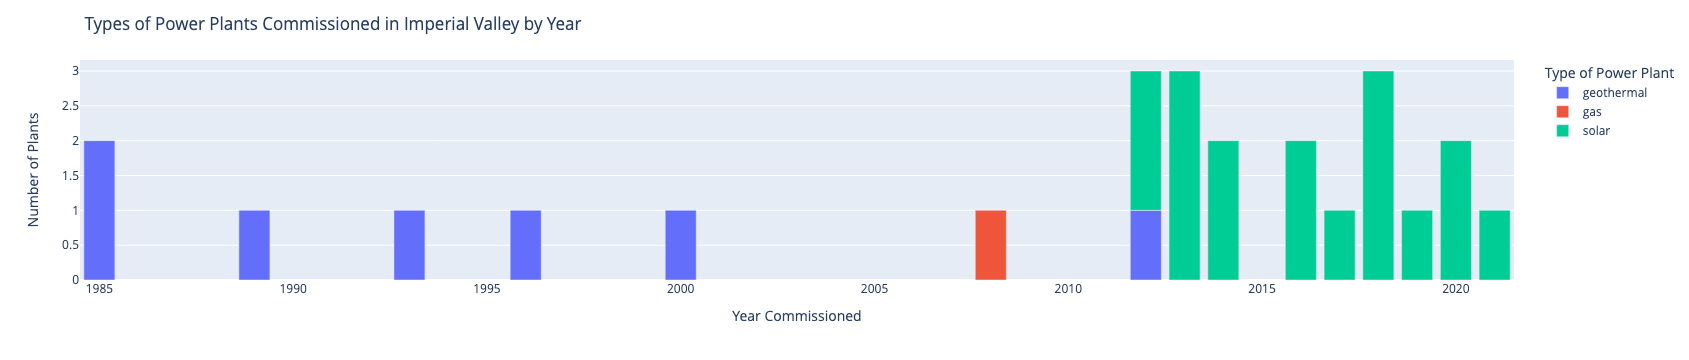

In [70]:
# make a stacked bar chart
fig = px.bar(plants_by_year,
       x='year_commissioned',
       y='count',
       color='plant:source'
)

fig.update_layout(
    title='Types of Power Plants Commissioned in Imperial Valley by Year',
    xaxis=dict(title='Year Commissioned'),
    yaxis=dict(title='Number of Plants'),
    legend= dict(
        title='Type of Power Plant',
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

fig.write_html("plants_by_year.html")

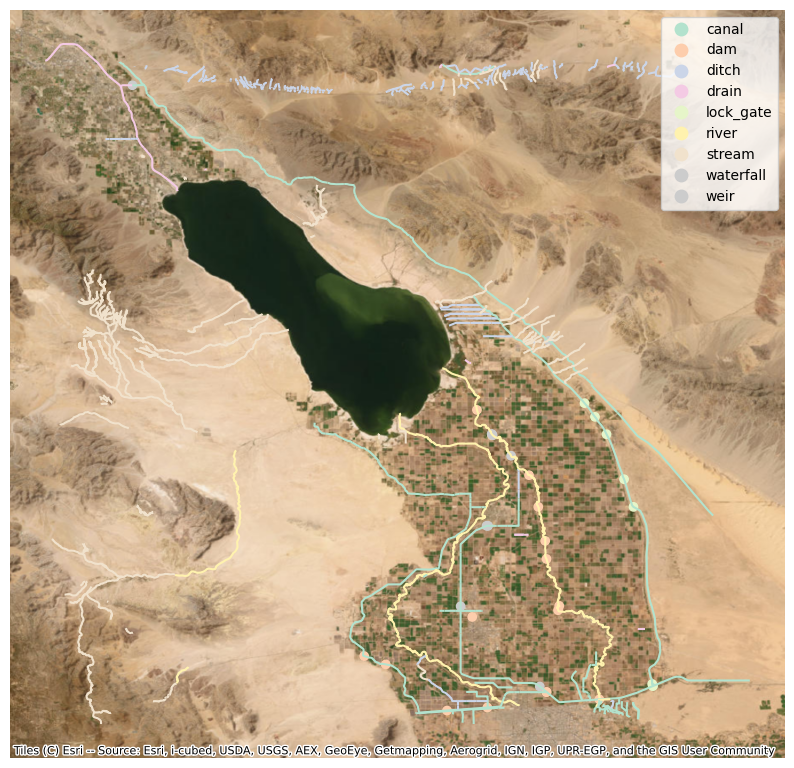

In [71]:
#Step One
osm_water2 = ox.geometries_from_bbox(33.701090957662295, 32.65492287146084, -116.20425754271368, -115.25770254774852, tags={'waterway':True})

                        
#Step Two: 
osm_water2 = osm_water2.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

#Step Three:
osm_water2.plot(ax=ax,
         column='waterway',
         cmap='Pastel2',
         legend=True)
ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

fig.savefig("waterways.jpg")

## Waterways in the Imperial Valley
Step One: Pull all data on waterways from open street map using set coordinates as geographic parameter and define that new data set as "osm_water" <br>
Step Two: Set the crs to espg=4236 <br>
Steo Three: Plot osm_water <br>
Step Four: Add the Esri.WorldImagry basemap

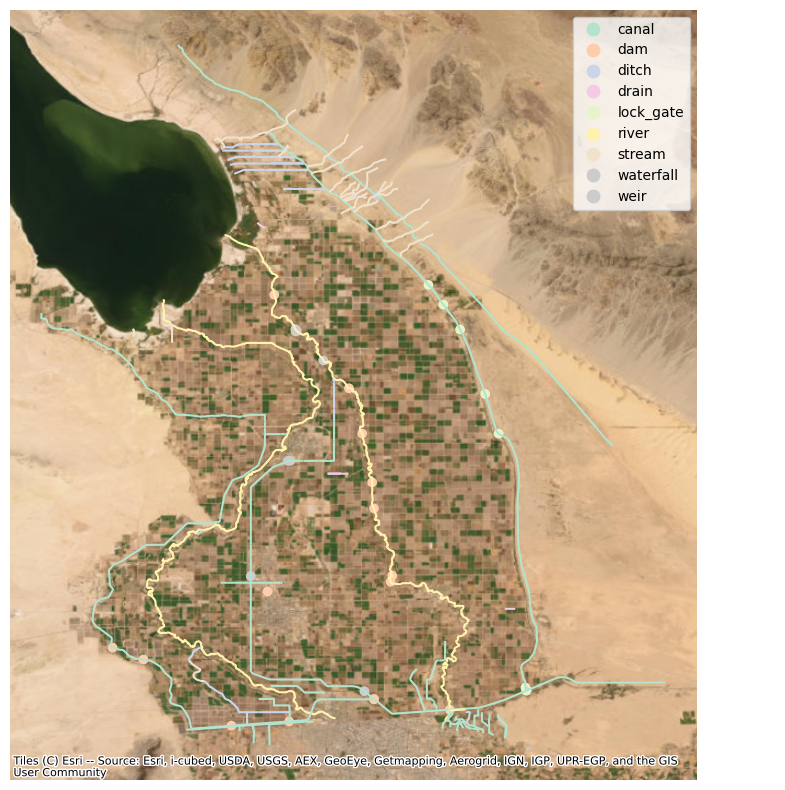

In [16]:

#Step One
osm_water = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'waterway':True})

#Step Two:
osm_water = osm_water.to_crs(epsg=4236)

#Step Three:
fig, ax = plt.subplots(figsize=(10,10))
osm_water.plot(ax=ax,
         column='waterway',
         cmap='Pastel2',
         legend=True)
ax.axis('off')

#Step Four:
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

## Asthma Mapping
Step One: Get the asthma data from calenviroscreen data<br>
Step Two: Clean up the FIPs Codes by changing to strings and adding leading zeros<br>
Step Three: Create a geodataframe that is just made up of the FIPs codes / census tracts we defined under above (see housekeeping)<br>
Step Four: Plot 'AsthmaP' variable from CalEnviroScreen over the Esri.WorldImgry Map <br>

- 'AsthmaP' variable describes how the rates in a given tract compares to other tracts across the state (percentile) <br>
- For example, a dark region in the 90th percentile means that the rates in that tract are higher than 90% of all other tracts<br>

Step Five: Plot Asthma variable from CalEnviroscreen over the Esri.WorldImagry Map <br>
- 'Asthma' variable is the number of trips to the emergency department per 10,000 people

(-116.98409285041606,
 -114.32948814952228,
 32.54557930245018,
 34.15294612860471)

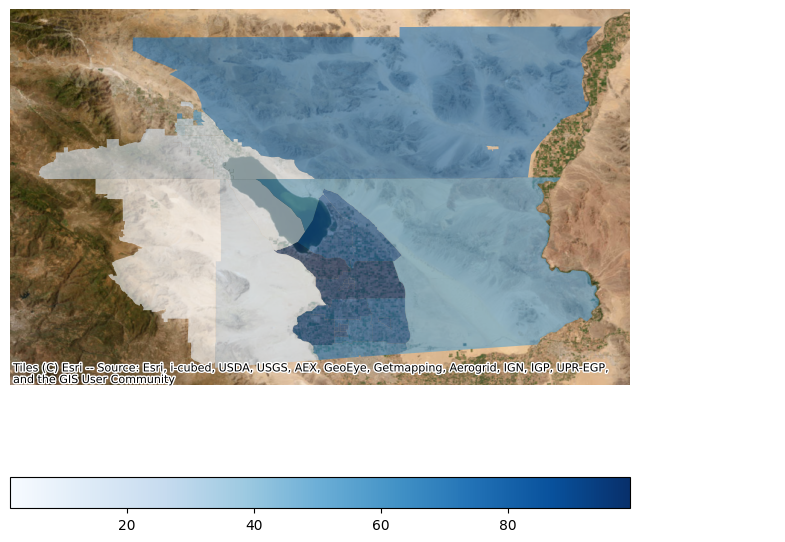

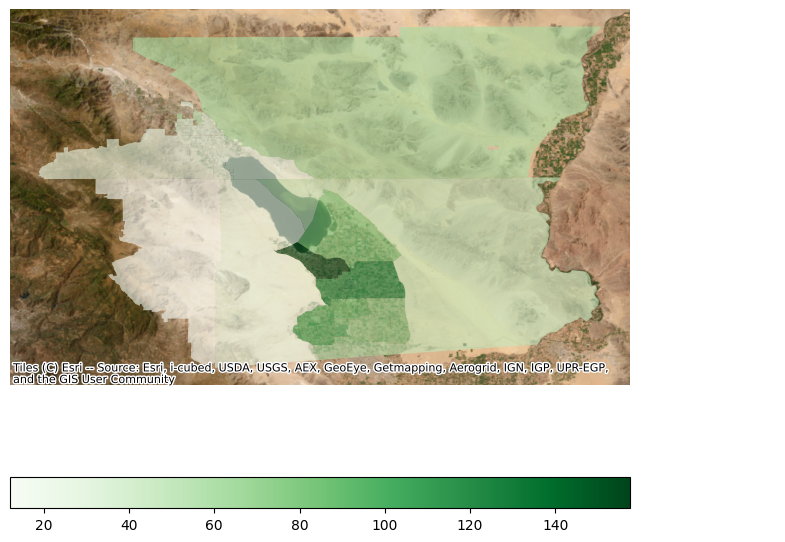

In [13]:
#Step One: 
calenviro_file = "data/CalEnviroScreen/calenviroscreen.zip"
calenviro = gpd.read_file(calenviro_file)

#Step Two:
calenviro['Tract'] = calenviro['Tract'].astype('int')
calenviro['Tract'] = calenviro['Tract'].astype('str')
calenviro["Tract"] = calenviro["Tract"].str.zfill(11)

#Step Three:
calenv_gdf= calenviro[calenviro['Tract'].isin(Our_FIPs)]

# Step Four:
calenv_gdf = calenv_gdf.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
calenv_gdf.plot(ax=ax,
               column='AsthmaP',
               legend=True,
               cmap='Blues',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

#Step Five:
calenv_gdf = calenv_gdf.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
calenv_gdf.plot(ax=ax,
               column='Asthma',
               legend=True,
               cmap='Greens',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

## Seth's Landcover Stuff

The way this data is structured, each record shows the percentage of the area of the county in a given level of drought (from D0 to D4) at a time. To show this we can show the approximate levels of drought in a given county over time.

We create a function that will create a stacked area plot to showcase the portion of the county in a given level of drought at a given time. I can then call this function in a loop to return a graph for each county in the data.

In [10]:
osm_power_yrs=pd.read_csv("osm_power_years.csv")

In [11]:
osm_power_yrs

element_type       osmid                                 name  \
0           way  1073692887                Calipatria Solar Farm   
1           way  1110445420              Calipatria State Prison   
2      relation     6235170                    Campo Verde Solar   
3      relation     6235171                          CE Leathers   
4      relation     9081854               Centinela Solar Energy   
5      relation     9222664         Centinela State Prison Solar   
6      relation    10945395              Citizens Imperial Solar   
7      relation    14180414                    Community Solar 1   
8      relation    14297873                    Del Ranch Company   
9      relation    14297874                      Dixieland Solar   
10     relation    14297878                               Drop 5   
11     relation    14297879            East Highline Power Plant   
12          way   315098441                El Centro Power Plant   
13          way   964189672                       Elmore Company   
14          way   964189673      Geo East Mesa II and Ormesa III   
15          way   964189674             Heber 1 Geothermal Plant   
16          way  1073692890             Heber 2 Geothermal Plant   
17          way  1073692897                          Heber Solar   
18          way  1073692902   Imperial Solar Energy Center South   
19     relation    14297876    Imperial Solar Energy Center West   
20     relation    14297880           Imperial Valley Solar Co 2   
21          way   166649173  Imperial Valley Solar Company 1 LLC   
22          way   917201159           Imperial Valley Solar Farm   
23          way   931029265           John L. Featherstone Plant   
24          way   964177732    Mesquite Lake Energy Park Plant 2   
25          way  1033095256  Mesquite Lake Water & Power Plant 1   
26          way  1073692900                  Midway Solar Farm 1   
27     relation    14180413                 Midway Solar Farm II   
28     relation    14297875                Midway Solar Farm III   
29     relation    14297877           Mount Signal Solar Farm II   
30          way    90915140            Mount Signal Solar Farm V   
31          way   192558741             Niland Gas Turbine Plant   
32          way   429981166       North Brawley Geothermal Plant   
33          way   607132293                             Ormesa I   
34          way   931590517                 Rockwood Power Plant   
35          way   964185965                     Salton Sea Power   
36          way  1073692869             Sol Orchard El Centro PV   
37          way  1073692874           Solar Gen 2 Solar Facility   
38          way  1073692877                     Valencia 1 Solar   
39          way  1073692878                     Valencia Solar 2   
40          way  1073692883                     Valencia Solar 3   
41          way  1073692888   Vulcan-BN Geothermal Power Company   
42          way  1073692889                 Wistaria Ranch Solar   
43          way  1150491227                                  NaN   

    year commissioned                                  operator  
0              2016.0                         Southern Power Co  
1                 NaN                            Ecoplexus, Inc  
2              2013.0                         Southern Power Co  
3              2000.0           CalEnergy Operating Corporation  
4              2014.0                       CD Arevon USA, Inc.  
5              2021.0                            Ecoplexus, Inc  
6              2019.0          Citizens Enterprises Corporation  
7                 NaN                                       NaN  
8              1989.0           CalEnergy Operating Corporation  
9                 NaN                                       AES  
10                NaN              Imperial Irrigation District  
11                NaN              Imperial Irrigation District  
12                NaN              Imperial Irrigation District  
13             199

In [12]:
osm_power=osm_power.merge(osm_power_yrs,on='name')

In [13]:
osm_power

barrier                                           geometry  \
0      NaN  POLYGON ((-115.77445 32.82951, -115.77443 32.8...   
1      NaN  POLYGON ((-115.60468 32.80413, -115.60469 32.8...   
2      NaN  MULTIPOLYGON (((-115.65228 32.67093, -115.6522...   
3      NaN  MULTIPOLYGON (((-115.66185 32.67047, -115.6596...   
4    fence  MULTIPOLYGON (((-115.79244 32.77625, -115.7924...   
5    fence  MULTIPOLYGON (((-115.77596 32.80080, -115.7759...   
6    fence  MULTIPOLYGON (((-115.73128 32.75760, -115.7312...   
7      NaN  MULTIPOLYGON (((-115.54085 32.81020, -115.5410...   
8      NaN  MULTIPOLYGON (((-115.57329 32.67779, -115.5652...   
9      NaN  MULTIPOLYGON (((-115.63513 32.67748, -115.6351...   
10     NaN  MULTIPOLYGON (((-115.62368 32.68171, -115.6237...   
11     NaN  MULTIPOLYGON (((-115.66192 32.67838, -115.6645...   
12     NaN  POLYGON ((-115.57443 33.21162, -115.57443 33.2...   
13     NaN  POLYGON ((-115.61909 33.17006, -115.61905 33.1...   
14     NaN  POLYGON ((-115.60200 33.18460, -115.59780 33.1...   
15     NaN  POLYGON ((-115.56298 33.18570, -115.55910 33.1...   
16     NaN  POLYGON ((-115.62241 33.05053, -115.62569 33.0...   
17   fence  POLYGON ((-115.53317 33.16103, -115.54066 33.1...   
18     NaN  POLYGON ((-115.61108 33.17006, -115.61105 33.1...   
19     NaN  MULTIPOLYGON (((-115.54910 33.18257, -115.5415...   
20     NaN  MULTIPOLYGON (((-115.64495 33.16756, -115.6428...   
21     NaN  POLYGON ((-115.49610 33.24943, -115.49443 33.2...   
22     NaN  POLYGON ((-115.48991 33.25527, -115.48995 33.2...   
23   fence  POLYGON ((-115.49681 33.15335, -115.49801 33.1...   
24     NaN  POLYGON ((-115.54031 33.02143, -115.53303 33.0...   
25   fence  POLYGON ((-115.48991 33.17481, -115.48995 33.1...   
26     NaN  POLYGON ((-115.49778 33.25523, -115.49763 33.2...   
27     NaN  MULTIPOLYGON (((-115.47159 33.14582, -115.4716...   
28     NaN  MULTIPOLYGON (((-115.43742 33.20411, -115.4370...   
29     NaN  MULTIPOLYGON (((-115.53237 33.17452, -115.5304...   
30     NaN  POLYGON ((-115.54036 32.80978, -115.54054 32.8...   
31     NaN  POLYGON ((-115.51620 32.72179, -115.51616 32.7...   
32   fence  POLYGON ((-115.25394 32.82275, -115.25345 32.8...   
33     NaN  POLYGON ((-115.26070 32.78275, -115.25917 32.7...   
34     NaN  POLYGON ((-115.53480 32.72196, -115.53078 32.7...   
35     NaN  POLYGON ((-115.53904 32.72201, -115.53480 32.7...   
36     NaN  POLYGON ((-115.38813 32.67932, -115.38862 32.6...   
37     NaN  POLYGON ((-115.27918 32.70582, -115.27925 32.7...   
38   fence  POLYGON ((-115.50639 32.91147, -115.50638 32.9...   
39   fence  POLYGON ((-115.50639 32.91147, -115.51041 32.9...   
40     NaN  POLYGON ((-115.53232 32.96123, -115.53232 32.9...   
41     NaN  POLYGON ((-115.53515 32.89235, -115.53515 32.8...   
42     NaN  POLYGON ((-115.50766 32.91777, -115.51045 32.9...   
43     NaN  POLYGON ((-115.47961 32.99183, -115.47961 32.9...   

                                                nodes     landuse  \
0   [9849123929, 9849123928, 9849123927, 984912392...         NaN   
1   [10158553123, 10158553122, 10158553121, 101585...         NaN   
2   [[[4196335329, 4196335331, 4196335320, 4196335...  industrial   
3   [[[4196335313, 4196335315, 4196335301, 4196335...         NaN   
4   [[[6119808448, 9099327011, 9099341170, 6119808...         NaN   
5   [[[6212014186, 6212013857, 6212014187, 6212014...  industrial   
6   [[[6465959329, 6465959328, 6465959327, 6465959...         NaN   
7   [[[6465972083, 6465972082, 6465972081, 6465972...         NaN   
8   [[[8332346841, 8332346842, 8332346843, 8332346...         NaN   
9   [[[8332327632, 8332327633, 8332327634, 8332327...         NaN   
10  [[[8332327663, 8332327664, 8332327665, 8332327...         NaN   
11  [[[4196335368, 4196335378, 4196335377, 4196335...         NaN   
12  [3211891464, 2302141139, 2302141123, 230214112...  industrial   
13  [9849124044, 8918467793, 8918467794, 984912404...  industrial   
14  [8918467797, 8918467798, 8918467799, 8